### DATASET DESCRIPTION
   * CSV file - 19237 rows x 18 columns (Includes Price Columns as Target)

### Attributes
* ID
* Price: price of the care(Target Column)
* Levy
* Manufacturer
* Model
* Prod. year
* Category
* Leather interior
* Fuel type
* Engine volume
* Mileage
* Cylinders
* Gear box type
* Drive wheels
* Doors
* Wheel
* Color
* Airbags

**ABOUT DATASET** :- This Data set is taken as Challenge from Kaggle. The Link is
    https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge




### IMPORTING LIBRARIES

In [123]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.metrics import r2_score 
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### DATA CLEANING AND PRE-PROCESSING

In [124]:
cars_original = pd.read_csv(r"C:\Users\verma\Documents\Processing\car price prediction challenge\archive without zip\car_price_prediction.csv")
cars_original.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [125]:
cars = cars_original.copy()

In [126]:
## We check shape of dataset 

print('The shape of dataset is ', cars.shape)

The shape of dataset is  (19237, 18)


In [127]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [128]:
# To check is there any null value

print(cars.isnull().sum(axis = 0))
print('There is no null value. ')

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64
There is no null value. 


**The Change need to do for Cleaning**
 1. Rename the columns for convinient
 2. Levy has "-" as missing value that need to remove and it should be in int 
 3. Remove "Turbo" from "EngineVolume" and change into numeric
 4. Remove "km" from "Mileage" column and change into numeric
 5. Remove Duplicated Rows from car dataset
 6. Need to Remove '-May', '-Mar' and '>' from Doors
  

**1. Rename the columns for convinient**

In [129]:
cars.rename(columns = {'Prod. year': 'year'}, inplace = True)
cars.rename(columns = {'Leather interior': 'LeatherInt', 'Fuel type': 'FuelType', 'Engine volume': 'EngineVolume', 'Gear box type': 'GearBoxType', 'Drive wheels':'DriveWheels'}, inplace = True)


**2. Levy has "-" as missing value that need to remove and it should be in int**

In [130]:
cars.Levy.unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

In [131]:
len(cars[cars['Levy']== '-'])

5819

**COMMENT :- ** We have large amount of data that are missing and it's not good idea to remove all rows beacuase it will remove many information regarding other features so we fill missing value by forward filling.

In [132]:
cars['Levy'].replace('-', np.nan, inplace = True)

In [133]:
# checking is it working!
len(cars[cars['Levy']== '-'])

0

In [134]:
# Now filling na value by forward filling
cars.Levy = cars.Levy.astype(float)
cars['Levy'].fillna(method = 'ffill', inplace = True)

In [135]:
cars["Levy"].isna().sum()

0

**3. Remove "Turbo" from "EngineVolume" and change into numeric**

In [136]:
cars.EngineVolume.unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [137]:
cars['EngineVolume'] = cars['EngineVolume'].str.split().str.get(0).astype(float)

**4. Remove "km" from "Mileage" column and change into numeric**

In [138]:
cars['Mileage'].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

In [139]:
cars['Mileage'] = cars['Mileage'].str.split().str.get(0).astype(int)

**5. Remove Duplicated Rows from car dataset**

In [140]:
cars[cars.duplicated()]

,ID,Price,Levy,Manufacturer,Model,year,Category,LeatherInt,FuelType,EngineVolume,Mileage,Cylinders,GearBoxType,DriveWheels,Doors,Wheel,Color,Airbags
2268,45815355,8154,1172.0,LEXUS,IS 350,2011,Sedan,Yes,Petrol,3.5,259066,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
2923,45815355,8154,1172.0,LEXUS,IS 350,2011,Sedan,Yes,Petrol,3.5,259066,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
3026,45730629,27946,528.0,HYUNDAI,Elantra,2014,Sedan,Yes,Diesel,1.6,102152,4.0,Automatic,Front,04-May,Left wheel,White,4
3383,45723475,19444,502.0,FORD,Fusion,2013,Sedan,No,Petrol,1.5,100000,4.0,Automatic,Front,04-May,Left wheel,Black,8
3433,45810013,34635,1077.0,HONDA,Civic,2019,Sedan,Yes,Petrol,2.0,2927,4.0,Automatic,Front,04-May,Left wheel,Grey,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,45815465,2352,1273.0,LEXUS,IS 350,2015,Sedan,Yes,Petrol,3.5,80856,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19137,45810466,15125,642.0,CHEVROLET,Orlando,2012,Jeep,Yes,Diesel,2.0,156834,4.0,Automatic,Front,04-May,Left wheel,Golden,4
19200,45725908,36065,640.0,MERCEDES-BENZ,CLA 250 AMG,2013,Sedan,Yes,Petrol,2.0,68000,4.0,Tiptronic,Front,04-May,Left wheel,Red,12
19203,45761487,13485,645.0,TOYOTA,Prius,2011,Sedan,No,Hybrid,1.8,281600,6.0,Automatic,Front,04-May,Left wheel,Grey,8


In [141]:
cars.drop_duplicates(inplace = True)

In [142]:
cars[cars.duplicated()]

,ID,Price,Levy,Manufacturer,Model,year,Category,LeatherInt,FuelType,EngineVolume,Mileage,Cylinders,GearBoxType,DriveWheels,Doors,Wheel,Color,Airbags


**6. Need to Remove '-May', '-Mar' and '>' from Doors and change in numeric**

In [143]:
cars['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [144]:
cars['Doors'] = cars['Doors'].map({'04-May':4, '02-Mar':2, '>5':5})

### Checking Data

In [145]:
cars.shape

(19030, 18)

In [146]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19030 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            19030 non-null  int64  
 1   Price         19030 non-null  int64  
 2   Levy          19030 non-null  float64
 3   Manufacturer  19030 non-null  object 
 4   Model         19030 non-null  object 
 5   year          19030 non-null  int64  
 6   Category      19030 non-null  object 
 7   LeatherInt    19030 non-null  object 
 8   FuelType      19030 non-null  object 
 9   EngineVolume  19030 non-null  float64
 10  Mileage       19030 non-null  int32  
 11  Cylinders     19030 non-null  float64
 12  GearBoxType   19030 non-null  object 
 13  DriveWheels   19030 non-null  object 
 14  Doors         19030 non-null  int64  
 15  Wheel         19030 non-null  object 
 16  Color         19030 non-null  object 
 17  Airbags       19030 non-null  int64  
dtypes: float64(3), int32(1), i

In [147]:
cars.describe()

,ID,Price,Levy,year,EngineVolume,Mileage,Cylinders,Doors,Airbags
count,1.903000e+04,1.903000e+04,19030.000000,19030.000000,19030.000000,1.903000e+04,19030.000000,19030.000000,19030.000000
mean,4.557533e+07,1.858865e+04,906.801997,2010.886337,2.306679,1.547477e+06,4.581661,3.925486,6.564950
std,9.381293e+05,1.916031e+05,464.241601,5.685631,0.877876,4.866621e+07,1.201025,0.404553,4.318068
min,2.074688e+07,1.000000e+00,87.000000,1939.000000,0.000000,0.000000e+00,1.000000,2.000000,0.000000
25%,4.569549e+07,5.331000e+03,640.000000,2009.000000,1.800000,7.020200e+04,4.000000,4.000000,4.000000
50%,4.577202e+07,1.317200e+04,781.000000,2012.000000,2.000000,1.264000e+05,4.000000,4.000000,6.000000
75%,4.580184e+07,2.211000e+04,1058.000000,2015.000000,2.500000,1.892482e+05,4.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,5.000000,16.000000


**COMMENT :-** here in max of price is higher compare to 3rd Quartile that good to remove and also there minimum price of car is 1 which is also outlier

**7. Remove the Outlier in Price**

In [148]:
cars.shape

(19030, 18)

In [149]:
cars[cars.Price < 1000]

,ID,Price,Levy,Manufacturer,Model,year,Category,LeatherInt,FuelType,EngineVolume,Mileage,Cylinders,GearBoxType,DriveWheels,Doors,Wheel,Color,Airbags
7,45816158,549,751.0,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118,4.0,Automatic,Front,4,Left wheel,Grey,12
10,45621750,941,1053.0,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,184467,6.0,Automatic,Rear,4,Left wheel,White,12
15,45465200,549,1079.0,TOYOTA,CHR,2018,Jeep,Yes,Petrol,2.0,74146,4.0,Automatic,Front,4,Left wheel,White,12
18,45772104,549,2386.0,HYUNDAI,Sonata,2006,Sedan,Yes,Petrol,3.3,295059,6.0,Automatic,Rear,4,Left wheel,Blue,12
19,45653306,941,1850.0,LEXUS,RX 400,2008,Jeep,Yes,Hybrid,3.5,364523,6.0,Automatic,4x4,4,Left wheel,Black,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19218,45748699,30,1624.0,NISSAN,Note,2006,Hatchback,No,Petrol,1.3,0,4.0,Automatic,Front,4,Right-hand drive,Green,9
19228,45773726,706,1850.0,MERCEDES-BENZ,E 350,2008,Sedan,Yes,Diesel,3.5,122874,6.0,Automatic,Rear,4,Left wheel,Black,12
19229,39977395,50,1850.0,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000,4.0,Automatic,Front,4,Left wheel,Silver,6
19230,45760891,470,645.0,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325,4.0,Automatic,Front,4,Left wheel,Silver,12


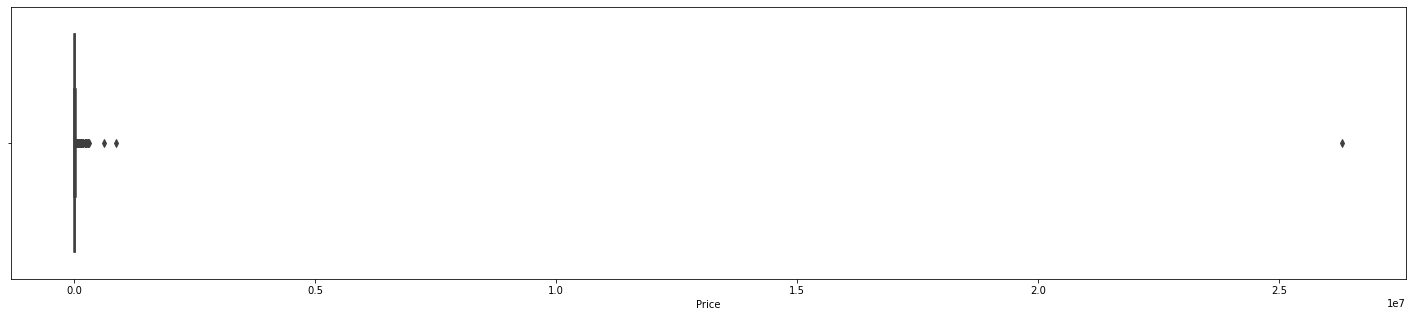

In [150]:
# Outlier detection
plt.figure(figsize = (25,5))
sns.boxplot(cars['Price'])
plt.show()

In [151]:
cars[cars.Price > 200000]

,ID,Price,Levy,Manufacturer,Model,year,Category,LeatherInt,FuelType,EngineVolume,Mileage,Cylinders,GearBoxType,DriveWheels,Doors,Wheel,Color,Airbags
1225,45795524,627220,753.0,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,Yes,Petrol,6.3,0,8.0,Tiptronic,4x4,4,Left wheel,Black,12
2283,45786808,219527,528.0,BENTLEY,Continental GT,2012,Coupe,Yes,Petrol,4.0,55500,8.0,Tiptronic,4x4,2,Left wheel,Black,0
5008,45810285,308906,1694.0,PORSCHE,911,2016,Coupe,Yes,Petrol,4.0,8690,6.0,Automatic,Rear,2,Left wheel,Black,12
5840,44991441,254024,1292.0,MERCEDES-BENZ,GLE 400 A M G,2016,Jeep,Yes,Petrol,3.0,73000,6.0,Tiptronic,4x4,4,Left wheel,Black,12
7283,45420737,228935,1016.0,MERCEDES-BENZ,GLE 63 AMG,2018,Jeep,Yes,Petrol,5.5,23000,8.0,Tiptronic,4x4,4,Left wheel,Black,16
7353,43683199,216391,645.0,MERCEDES-BENZ,G 65 AMG G63 AMG,2013,Jeep,Yes,Petrol,5.5,54000,8.0,Tiptronic,4x4,4,Left wheel,Black,12
7749,45760644,288521,2269.0,BMW,M5 Машина в максимально,2018,Sedan,Yes,Petrol,4.4,13500,8.0,Tiptronic,4x4,4,Left wheel,Black,0
8541,45761204,872946,2067.0,LAMBORGHINI,Urus,2019,Universal,Yes,Petrol,4.0,2531,8.0,Tiptronic,4x4,4,Left wheel,Black,0
9367,45229113,297930,1080.0,MERCEDES-BENZ,AMG GT S,2015,Coupe,Yes,Petrol,4.0,20000,8.0,Tiptronic,Rear,2,Left wheel,White,16
10759,45291161,260296,639.0,LEXUS,LX 570,2018,Jeep,Yes,Petrol,5.7,17700,8.0,Tiptronic,4x4,4,Left wheel,Black,10


In [152]:
 # Remove lower outlier in Price

cars = cars[cars.Price > 1000]

In [153]:
# Remove upper outlier in Price

cars = cars[cars.Price < 200000]

In [154]:
cars.shape

(16485, 18)

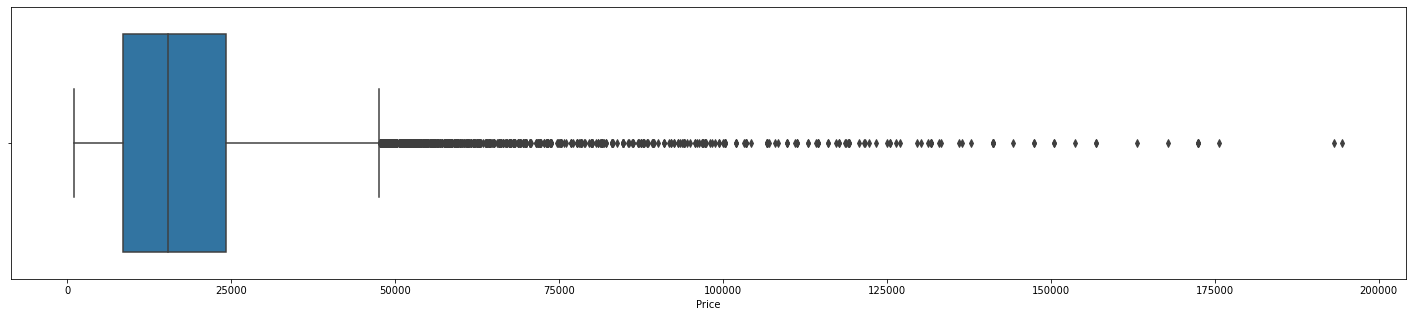

In [155]:
# Outlier detection
plt.figure(figsize = (25,5))
sns.boxplot(cars['Price'])
plt.show()

**COMMENT :-** Because we have large amount and in cluster of outlier it is not good idea to remove whole outlier because they are in large amount and may contain important information so we try to remove only those outlier which is not in cluster because it does not give sufficient information or may be it is extreme/rare cases of occurance.

In [156]:
Q1 = np.percentile(cars['Price'],25)
Q3 = np.percentile(cars['Price'],75)
IQR = Q3 - Q1
    
    # Define lower and Upper bound
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)
print('upper bound:-', upper_bound)
print('no of outlier which are outside the upper bound:-',  (cars['Price'] > upper_bound).sum())
print('no of outlier which are above 100000:- ', (cars['Price'] > 100000).sum())
print('no of outlier which are above 70000:- ', (cars['Price'] > 70000).sum())

upper bound:- 47620.0
no of outlier which are outside the upper bound:- 1027
no of outlier which are above 100000:-  98
no of outlier which are above 70000:-  311


In [157]:
cars = cars[cars['Price']<70000]

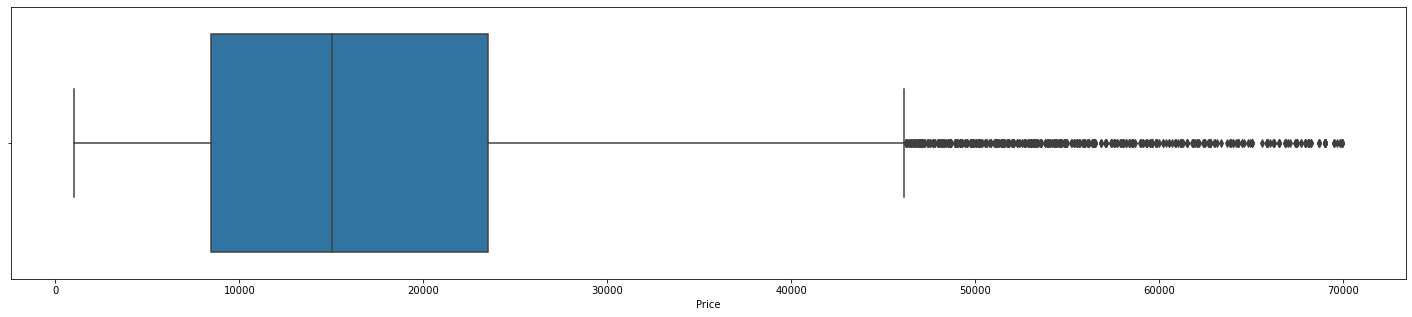

In [158]:
# Outlier detection
plt.figure(figsize = (25,5))
sns.boxplot(cars['Price'])
plt.show()

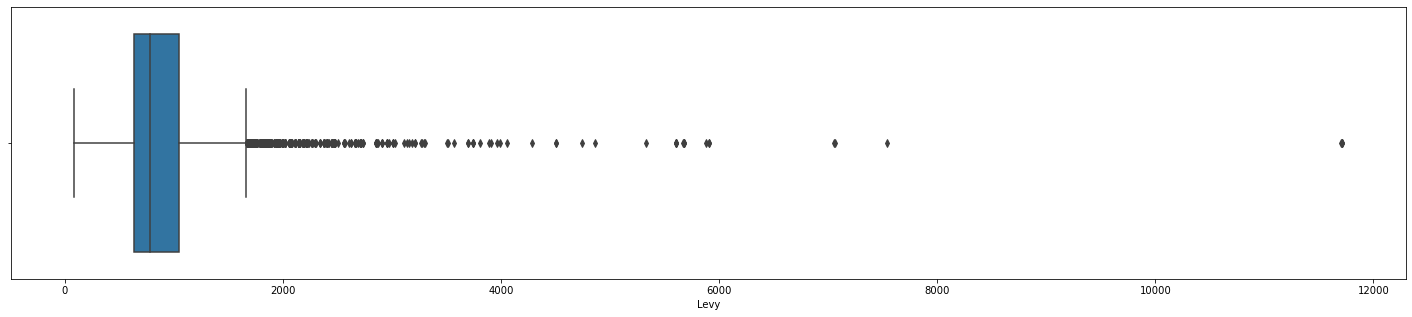

In [159]:
# Boxplot of Levy
plt.figure(figsize = (25,5))
sns.boxplot(cars['Levy'])
plt.show()

In [160]:
cars.shape

(16174, 18)

In [161]:
def outliers_detection(data,f):
    #  IQR method to treat the outliers
    Q1 = np.percentile(data[f],25)
    Q3 = np.percentile(data[f],75)
    IQR = Q3 - Q1
    
    # Define lower and Upper bound
    lower_bound = Q1 - (1.5*IQR)
    data = data[data[f]> lower_bound]
    upper_bound = Q3 + (1.5*IQR)
    data = data[data[f]< upper_bound]
    
    return data

In [162]:

## using for loop to extract outlier from Levy column

for i in range(1):
    for feature in ['Levy']:   #'Price', 
        cars = outliers_detection(cars,feature)



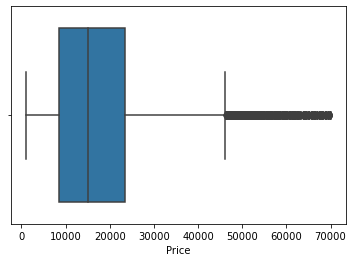

In [163]:
sns.boxplot(cars['Price'])
plt.show()

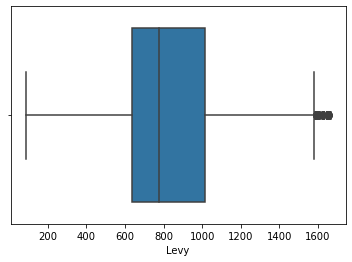

In [164]:
sns.boxplot(cars['Levy'])
plt.show()

In [165]:
cars.shape

(15407, 18)

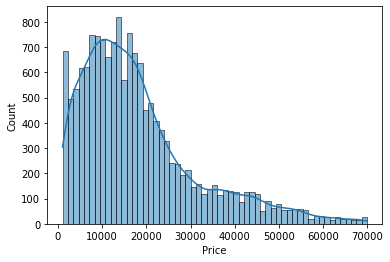

In [166]:
sns.histplot(cars['Price'], kde = True)
plt.show()

In [167]:
cars.describe()

,ID,Price,Levy,year,EngineVolume,Mileage,Cylinders,Doors,Airbags
count,1.540700e+04,15407.000000,15407.000000,15407.000000,15407.000000,1.540700e+04,15407.000000,15407.000000,15407.000000
mean,4.560941e+07,18111.756604,827.210554,2010.746803,2.196106,1.315545e+06,4.443954,3.920101,6.317323
std,7.222689e+05,13377.732153,278.054002,5.667065,0.738045,4.365625e+07,1.061443,0.416977,4.046045
min,2.494033e+07,1019.000000,87.000000,1953.000000,0.000000,0.000000e+00,1.000000,2.000000,0.000000
25%,4.572663e+07,8467.000000,639.000000,2009.000000,1.700000,7.076350e+04,4.000000,4.000000,4.000000
50%,4.577686e+07,15053.000000,777.000000,2012.000000,2.000000,1.239320e+05,4.000000,4.000000,4.000000
75%,4.580221e+07,23521.000000,1017.000000,2014.000000,2.500000,1.806590e+05,4.000000,4.000000,10.000000
max,4.581665e+07,69935.000000,1664.000000,2020.000000,6.300000,2.147484e+09,16.000000,5.000000,16.000000


**COMMENT :-** Here year of cars made given, Let's also try age of cars also

**8. Creating column for car age**

In [168]:
cars['Current Year'] = 2023
cars['Age'] =  cars['Current Year'] - cars['year']
cars.drop(columns = ['Current Year'], inplace = True)

In [169]:
cars.shape

(15407, 19)

In [170]:
cars

,ID,Price,Levy,Manufacturer,Model,year,Category,LeatherInt,FuelType,EngineVolume,Mileage,Cylinders,GearBoxType,DriveWheels,Doors,Wheel,Color,Airbags,Age
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,13
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,12
2,45774419,8467,1018.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,17
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,12
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055.0,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800,6.0,Automatic,Rear,4,Left wheel,Grey,12,10
19232,45798355,8467,1055.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,2,Left wheel,Silver,5,24
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8,12
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,4,Left wheel,Grey,4,13


### MODEL

In [171]:
cars.drop(columns = ['ID'], axis = 1, inplace = True)

In [172]:
# Reset index 

cars.reset_index(inplace = True)

In [173]:
cars.drop(['index'], axis = 1, inplace = True)

In [174]:
cars.head()

,Price,Levy,Manufacturer,Model,year,Category,LeatherInt,FuelType,EngineVolume,Mileage,Cylinders,GearBoxType,DriveWheels,Doors,Wheel,Color,Airbags,Age
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,13
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,12
2,8467,1018.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,17
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,12
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,9


**COMMENT :-**  here many columns are categorical data type that need to convert into numeric for interpretation use.

### Transform categorical data in numeric 
    Categorical data columns
      - Manufacturer
      - Model
      - Category
      - year
      - Leatherint
      - FuelType
      - GearBoxType
      - DriveWheels
      - Doors
      - Wheel
      - Color
     
    Numerical data columns
      - ID
      - Price
      - Levy
      - EngineVolume
      - Mileage
      - Cylinders
      - Airbags
      - Age

### Using LabelEncoder try to convert categortcal data into numeric data 

In [175]:
print(cars.columns)
cars['Price'].dtype.name

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'year', 'Category',
       'LeatherInt', 'FuelType', 'EngineVolume', 'Mileage', 'Cylinders',
       'GearBoxType', 'DriveWheels', 'Doors', 'Wheel', 'Color', 'Airbags',
       'Age'],
      dtype='object')


'int64'

In [176]:
categorical_data = []
numerical_data = []
for i in cars.columns:
    if cars[i].dtype.name == 'object' :
        categorical_data.append(i)
    else:
        numerical_data.append(i)
        
print('Numerical data are : ', numerical_data)
print('Categorical data are : ', categorical_data)

Numerical data are :  ['Price', 'Levy', 'year', 'EngineVolume', 'Mileage', 'Cylinders', 'Doors', 'Airbags', 'Age']
Categorical data are :  ['Manufacturer', 'Model', 'Category', 'LeatherInt', 'FuelType', 'GearBoxType', 'DriveWheels', 'Wheel', 'Color']


In [177]:
LE = LabelEncoder()

In [178]:
for i in categorical_data:
    cars[i] = LE.fit_transform(cars[i])

In [179]:
cars.head()

,Price,Levy,Manufacturer,Model,year,Category,LeatherInt,FuelType,EngineVolume,Mileage,Cylinders,GearBoxType,DriveWheels,Doors,Wheel,Color,Airbags,Age
0,13328,1399.0,28,1104,2010,4,1,2,3.5,186005,6.0,0,0,4,0,12,12,13
1,16621,1018.0,7,589,2011,4,0,5,3.0,192000,6.0,2,0,4,0,1,8,12
2,8467,1018.0,18,611,2006,3,0,5,1.3,200000,4.0,3,1,4,1,1,2,17
3,3607,862.0,14,592,2011,4,1,2,2.5,168966,4.0,0,0,4,0,14,0,12
4,11726,446.0,18,611,2014,3,1,5,1.3,91901,4.0,0,1,4,0,12,4,9


### ------------------------------------------------------ LINEAR REGRESSION ---------------------------------------------------------------

In [180]:
x = cars.drop(columns = ['Price'], axis = 1)
# ID has almost same no of unique value so that will not be that much helpfull to interpretation, it's better to remove it
y = cars[['Price']]

###  Scaling the Data
  *  Since the data in conditions has data points far from each other, scaling is a technique to make them closer to each other. It help to find optimal value for coefficients.

In [181]:
print('no of columns: ', len(x.columns))
x.head()

no of columns:  17


,Levy,Manufacturer,Model,year,Category,LeatherInt,FuelType,EngineVolume,Mileage,Cylinders,GearBoxType,DriveWheels,Doors,Wheel,Color,Airbags,Age
0,1399.0,28,1104,2010,4,1,2,3.5,186005,6.0,0,0,4,0,12,12,13
1,1018.0,7,589,2011,4,0,5,3.0,192000,6.0,2,0,4,0,1,8,12
2,1018.0,18,611,2006,3,0,5,1.3,200000,4.0,3,1,4,1,1,2,17
3,862.0,14,592,2011,4,1,2,2.5,168966,4.0,0,0,4,0,14,0,12
4,446.0,18,611,2014,3,1,5,1.3,91901,4.0,0,1,4,0,12,4,9


In [182]:
# Here we Standardization in Scaling the data


# Initialise the Scaler
scaler = StandardScaler()

In [183]:
scaled_x = scaler.fit_transform(x)

###  Model Building and Evaluation 

### Using StatsModels Package 

In [184]:
import statsmodels.api as sm

In [185]:
scaled_x

array([[ 2.05646385, -0.0861978 ,  0.92351989, ...,  0.77575351,
         1.40454722,  0.13178386],
       [ 0.68618195, -1.35601696, -0.47886396, ..., -1.29181234,
         0.41589536, -0.04468006],
       [ 0.68618195, -0.69087359, -0.4189563 , ..., -1.29181234,
        -1.06708242,  0.83763954],
       ...,
       [ 0.0136289 , -0.56993843,  1.11958132, ...,  0.58779298,
         0.41589536, -0.04468006],
       [ 0.0316116 , -0.56993843,  1.37282734, ..., -0.16404915,
        -0.57275649,  0.13178386],
       [ 1.65724786, -1.35601696, -0.96901754, ..., -1.29181234,
        -0.57275649,  0.66117562]])

In [186]:
scaled_x = sm.add_constant(scaled_x)

In [187]:
from sklearn.model_selection import train_test_split

### Train test split

In [188]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size = 0.20, random_state = 120)

In [189]:
mod = sm.OLS(y_train,x_train).fit()

In [190]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     286.3
Date:                Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:44:37   Log-Likelihood:            -1.3267e+05
No. Observations:               12325   AIC:                         2.654e+05
Df Residuals:                   12308   BIC:                         2.655e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.807e+04    103.165    175.156      0.0

<pre>
The features whose p value is greater than 0.05 are eleminated, as there is no significance in their coefficients along with the features cause multi collinearity
</pre>

<pre>
so we can remove columns Manufacturer, Mileage,Cylinders
</pre>

In [194]:
x = sm.add_constant(x.drop(['Manufacturer','Mileage','Cylinders'],axis = 1))
y = cars["Price"]


In [195]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 120)
mod = sm.OLS(y_train,x_train).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     304.6
Date:                Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:47:51   Log-Likelihood:            -1.1609e+05
No. Observations:               10784   AIC:                         2.322e+05
Df Residuals:                   10770   BIC:                         2.323e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5301      0.011    -46.954   

**COMMENT:-** Here R-squared value is low so we try to remove first outlier from each columns

In [196]:
x.head()

,const,Levy,Model,year,Category,LeatherInt,FuelType,EngineVolume,GearBoxType,DriveWheels,Doors,Wheel,Color,Airbags,Age
0,1.0,1399.0,1104,2010,4,1,2,3.5,0,0,4,0,12,12,13
1,1.0,1018.0,589,2011,4,0,5,3.0,2,0,4,0,1,8,12
2,1.0,1018.0,611,2006,3,0,5,1.3,3,1,4,1,1,2,17
3,1.0,862.0,592,2011,4,1,2,2.5,0,0,4,0,14,0,12
4,1.0,446.0,611,2014,3,1,5,1.3,0,1,4,0,12,4,9


In [197]:
len(x.columns)
x.columns

Index(['const', 'Levy', 'Model', 'year', 'Category', 'LeatherInt', 'FuelType',
       'EngineVolume', 'GearBoxType', 'DriveWheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Age'],
      dtype='object')

In [198]:
print(numerical_data)


['Price', 'Levy', 'year', 'EngineVolume', 'Mileage', 'Cylinders', 'Doors', 'Airbags', 'Age']


boxplot of the variable Levy


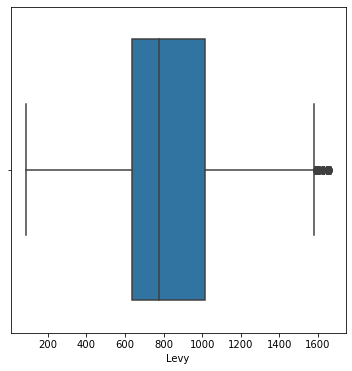

boxplot of the variable year


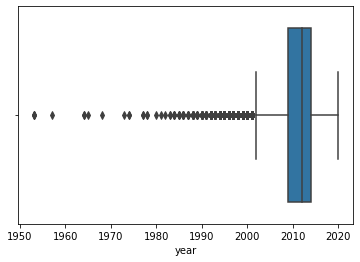

boxplot of the variable EngineVolume


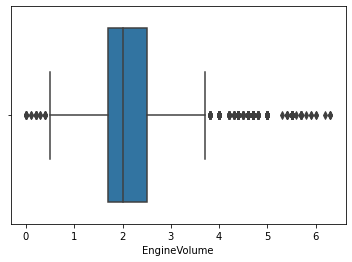

boxplot of the variable Mileage


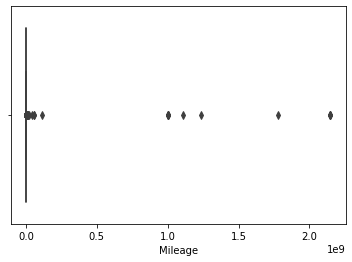

boxplot of the variable Cylinders


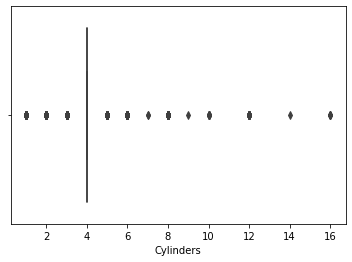

boxplot of the variable Doors


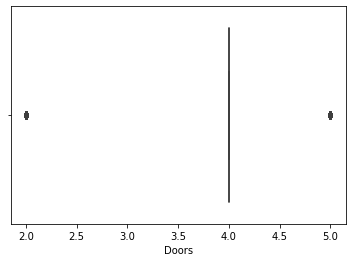

boxplot of the variable Airbags


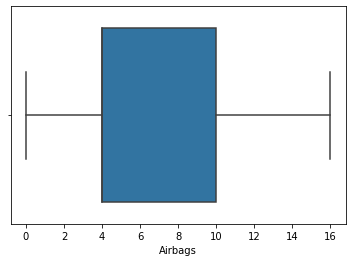

boxplot of the variable Age


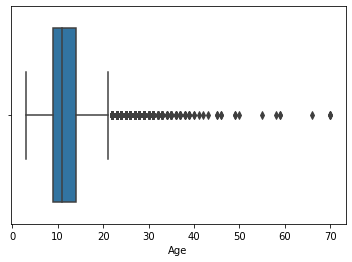

In [199]:
plt.figure(figsize = (6,6))
for i in numerical_data:
    if i != 'Price':
        print("boxplot of the variable",i)
        sns.boxplot(cars[i])
        plt.show()

**COMMENT :-** We only Remove outlier which are not in cluster or those Outlier which has rare chance of occurance.

In [200]:
cars = cars[cars['year'] > 1980]

In [201]:
cars = cars[cars['EngineVolume'] < 5]

In [202]:
cars = cars[cars['Cylinders'] < 10]

In [203]:
cars= cars[cars['Age'] < 40]

In [208]:
numerical_data

['Price',
 'Levy',
 'year',
 'EngineVolume',
 'Mileage',
 'Cylinders',
 'Doors',
 'Airbags',
 'Age']

boxplot of the variable Levy


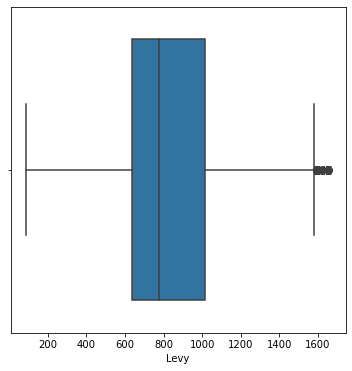

boxplot of the variable year


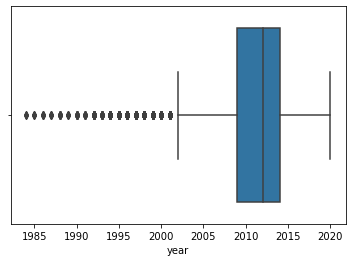

boxplot of the variable EngineVolume


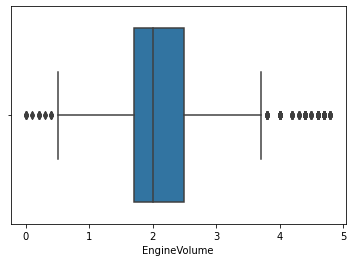

boxplot of the variable Mileage


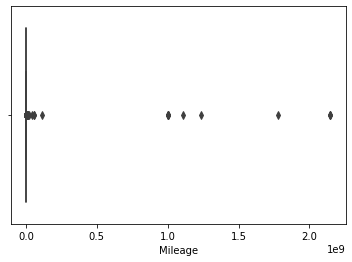

boxplot of the variable Cylinders


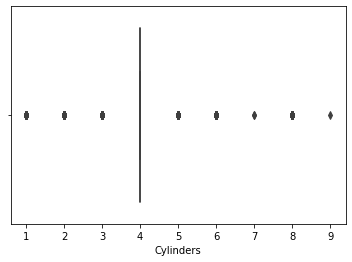

boxplot of the variable Doors


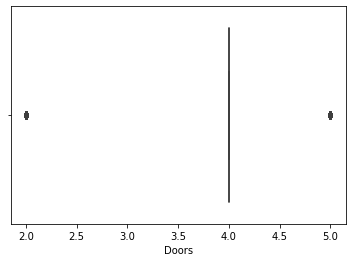

boxplot of the variable Airbags


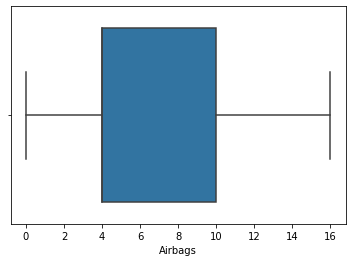

boxplot of the variable Age


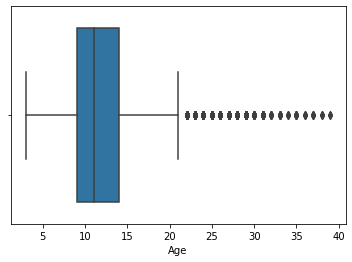

In [209]:
# Boxplot after remove outliers

plt.figure(figsize = (6,6))
for i in numerical_data:
    if (i != 'Price'):
        print("boxplot of the variable",i)
        sns.boxplot(cars[i])
        plt.show()

<AxesSubplot:xlabel='Levy'>

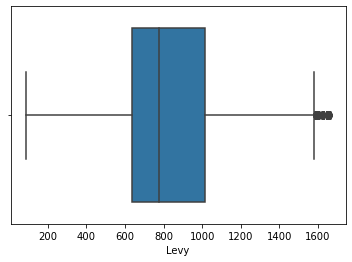

In [210]:
sns.boxplot(cars['Levy'])

###  Now fit model again 

In [211]:
x = cars.drop(columns = ['Price'], axis = 1)

y = cars[['Price']]

In [212]:
scaler = StandardScaler()

In [213]:
scaled_x = scaler.fit_transform(x)

In [214]:
scaled_x = sm.add_constant(scaled_x)

In [217]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = 0.3,random_state = 120)
mod = sm.OLS(y_train,x_train).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     272.1
Date:                Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:50:05   Log-Likelihood:            -1.1467e+05
No. Observations:               10672   AIC:                         2.294e+05
Df Residuals:                   10655   BIC:                         2.295e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         1.8e+04    108.749    165.493      0.0

**There are some Feature which has P value more than 0.05 so it's better to remove that feature.**

**Remove feature that are not relavant**
  - Manufacturer
  - Mileage
  - color

In [219]:
x = cars.drop(columns = ['Manufacturer', 'Mileage', 'Color','Price'], axis = 1)
y = cars[['Price']]

In [220]:
x

,Levy,Model,year,Category,LeatherInt,FuelType,EngineVolume,Cylinders,GearBoxType,DriveWheels,Doors,Wheel,Airbags,Age
0,1399.0,1104,2010,4,1,2,3.5,6.0,0,0,4,0,12,13
1,1018.0,589,2011,4,0,5,3.0,6.0,2,0,4,0,8,12
2,1018.0,611,2006,3,0,5,1.3,4.0,3,1,4,1,2,17
3,862.0,592,2011,4,1,2,2.5,4.0,0,0,4,0,0,12
4,446.0,611,2014,3,1,5,1.3,4.0,0,1,4,0,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15402,1055.0,538,2013,9,1,1,3.5,6.0,0,2,4,0,12,10
15403,1055.0,343,1999,1,1,0,2.0,4.0,1,2,2,0,5,24
15404,831.0,1176,2011,9,1,5,2.4,4.0,2,1,4,0,8,12
15405,836.0,1269,2010,4,1,1,2.0,4.0,0,1,4,0,4,13


In [221]:
scaler = StandardScaler()

In [222]:
scaled_x = scaler.fit_transform(x)

In [223]:
scaled_x = sm.add_constant(scaled_x)

In [224]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = 0.3,random_state = 120)
mod = sm.OLS(y_train,x_train).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     334.7
Date:                Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:53:13   Log-Likelihood:            -1.1467e+05
No. Observations:               10672   AIC:                         2.294e+05
Df Residuals:                   10658   BIC:                         2.295e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         1.8e+04    108.739    165.515      0.0

### Checking Assumptions

### Linearity of the Model

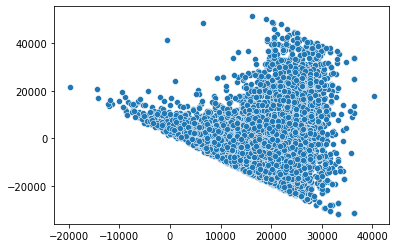

In [225]:
sns.scatterplot(mod.predict(x_train), mod.resid)
plt.show()

### Residual Plot

In [226]:
mod.resid.mean()

-1.677792737326086e-11

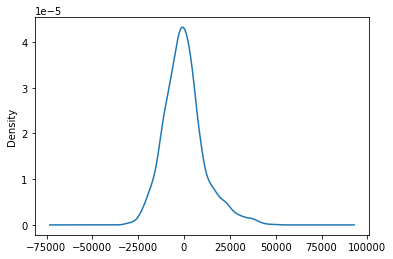

In [229]:
mod.resid.plot(kind = 'kde')
plt.show()

In [231]:
mod.resid.skew(),mod.resid.kurt()

(0.7292222728474974, 1.3004200878418386)

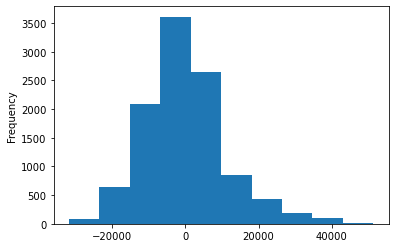

In [232]:
mod.resid.plot(kind = 'hist')
plt.show()

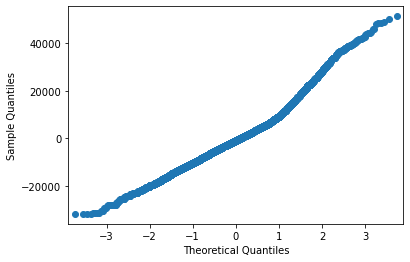

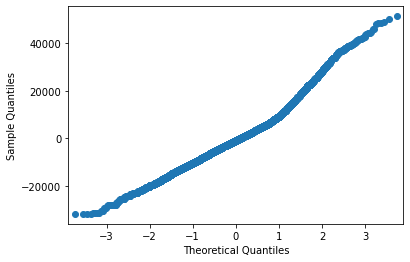

In [233]:
sm.qqplot(mod.resid)

**COMMENT :-** Our model still not fit so Try log transformation.**

### APPLYING LOG TRANSFORMATION

In [237]:
cars.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'year', 'Category',
       'LeatherInt', 'FuelType', 'EngineVolume', 'Mileage', 'Cylinders',
       'GearBoxType', 'DriveWheels', 'Doors', 'Wheel', 'Color', 'Airbags',
       'Age'],
      dtype='object')

In [282]:
x = sm.add_constant(cars.drop(['Price','Manufacturer','Mileage','Cylinders','Doors'],axis = 1))
y = np.log(cars["Price"])
scaled_x = scaler.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = 0.3,random_state = 120)
mod = sm.OLS(y_train,x_train).fit()
print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          9.909e+04
Date:                Sat, 07 Jan 2023   Prob (F-statistic):                        0.00
Time:                        15:26:59   Log-Likelihood:                         -13580.
No. Observations:               10672   AIC:                                  2.719e+04
Df Residuals:                   10659   BIC:                                  2.728e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<pre>
<b>After applying the log transformation the R sqaure is 0.992</b>
</pre>

### --------------------------------------------------- Checking Assumptions --------------------------------------------------------------------

### 1. Linearity of the Model

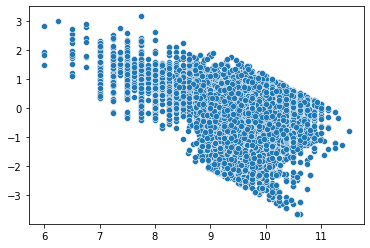

In [262]:
sns.scatterplot(mod.predict(x_train), mod.resid)
plt.show()

**COMMENT :-** After log transformation, by scatter plot can see that there exist some kind of relationship 

### 2. Normality test by Residual Plot

In [263]:
mod.resid.mean()

0.0009860075573751522

<AxesSubplot:ylabel='Density'>

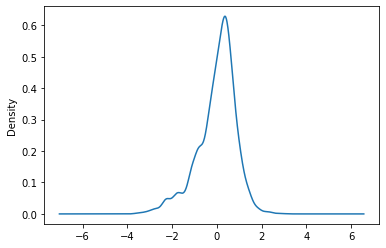

In [264]:
mod.resid.plot(kind = 'kde')

In [265]:
mod.resid.skew(),mod.resid.kurt()

(-0.8406751751667255, 1.2269315903225015)

<AxesSubplot:ylabel='Frequency'>

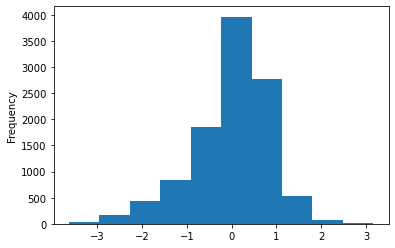

In [266]:
mod.resid.plot(kind = 'hist') 

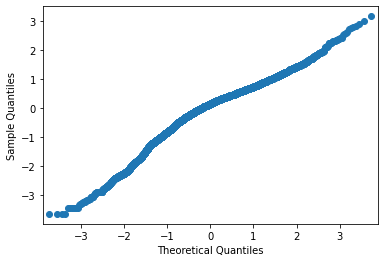

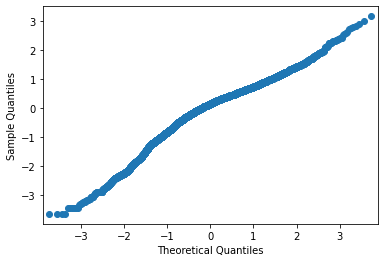

In [286]:
sm.qqplot(mod.resid)

**COMMENT :-** 
The p-value for the jarque-bera test - 0.0, which is less than 0.05.
Therefore, according to the jarque-bera test, so we reject the null hypothesis that the data is normal

### 3. Correlation

<AxesSubplot:>

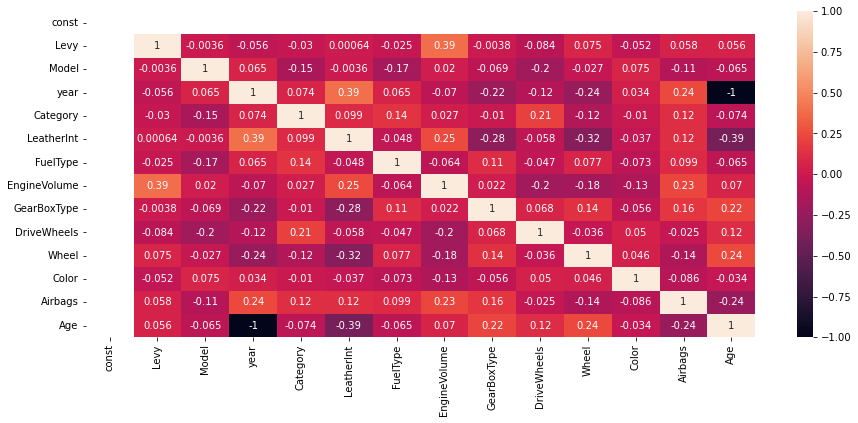

In [268]:
plt.figure(figsize = (15,6))
sns.heatmap(x.corr(),annot = True)


**COMMENT :-** By correlation we can say that observations are not highly correlated.

### TEST HETEROSCEDASTICITY

In [274]:
from sklearn.metrics import mean_squared_error

<AxesSubplot:xlabel='Price'>

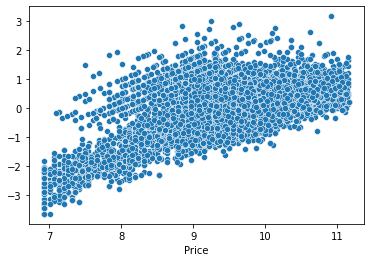

In [278]:
sns.scatterplot(y,mod.resid)

In [280]:
import statsmodels.stats.api as ssa
ssa.het_breuschpagan(mod.resid,mod.model.exog)

(3228.034508055613, 0.0, 355.55511227490825, 0.0)

<pre>
however, the breuschpagan test p value is 0.0 which is less than 0.05
<b>So we reject the null hypothesis that there is homoscedasticity.
The errors doesn't have a constant variance even after applying the log transformation</b>
</pre>

### TEST MODEL ON TRAINING AND TESTING MODEL

In [277]:
predict_train = mod.predict(x_train)
predict_test = mod.predict(x_test)
RMSE_train = np.sqrt(mean_squared_error(predict_train,y_train))
print('Root Mean square error on Train data ', RMSE_train)
RMSE_test = np.sqrt(mean_squared_error(predict_test,y_test))
print('Root Mean square error on Testing data ', RMSE_test)

Root Mean square error on Train data  0.863729987255152
Root Mean square error on Testing data  0.8734226250783823


**CONCLUSION :-** 
   * Even after applying log transformation model didn't satisfy the assumption.
   * But by above we can say that The way model behave to training data, model also behaving the same on Testing data.
   * With increasing 0.992, high R^2 squared .
   * There may be not good idea to apply Multiple Linear regression, may be other model work well. 